<a href="https://colab.research.google.com/github/Brandonj171/Brandonj171/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_diabetes


diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
print(diabetes.data.shape)

(442, 10)


In [6]:
print(diabetes.target.shape)

(442,)


In [7]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [8]:
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [9]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['DiseaseProgression'] = pd.Series(diabetes.target)

In [10]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02,151.00
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09,75.00
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03,141.00
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01,206.00
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05,135.00


In [11]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
import pandas as pd


In [13]:
sample_df = diabetes_df.sample(frac=0.1, random_state=42)

In [14]:
sns.set_context("notebook", font_scale=1.5)

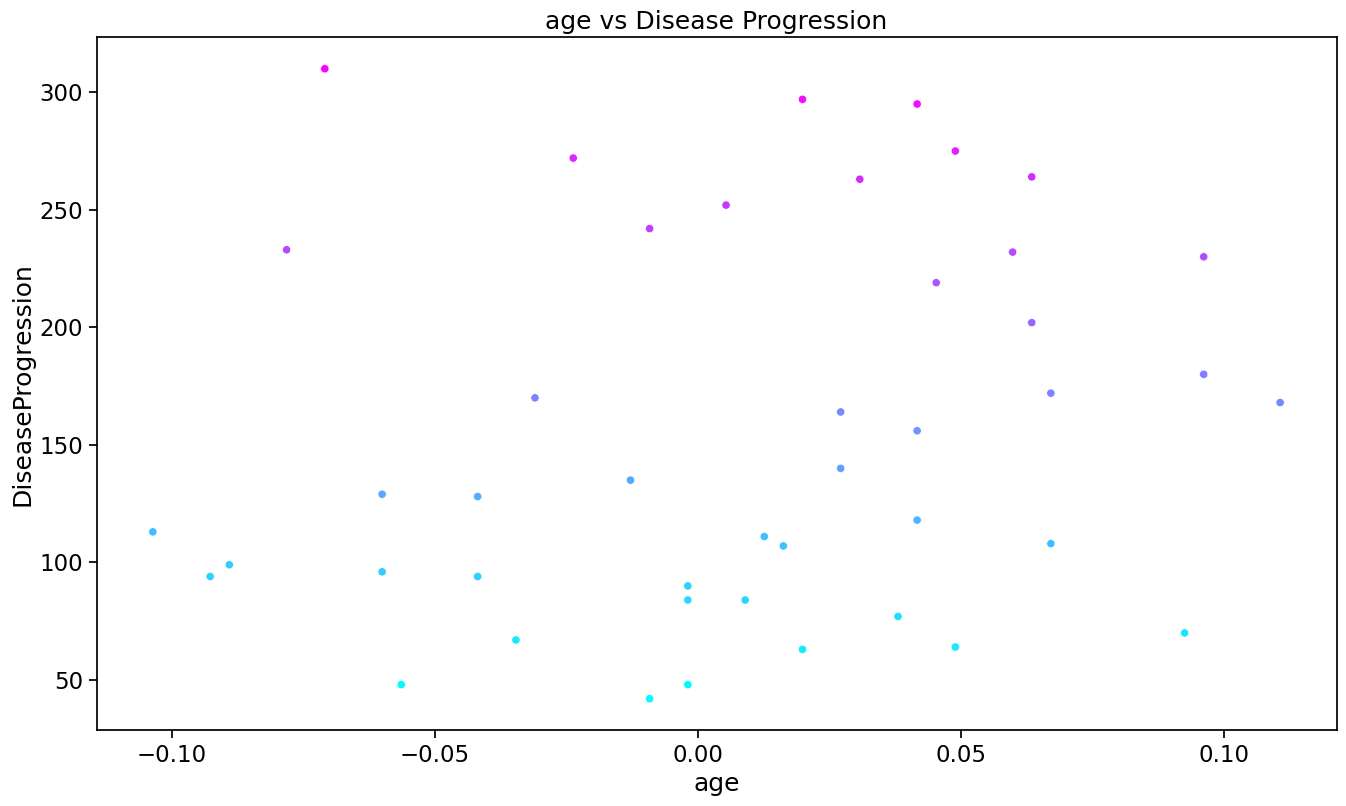

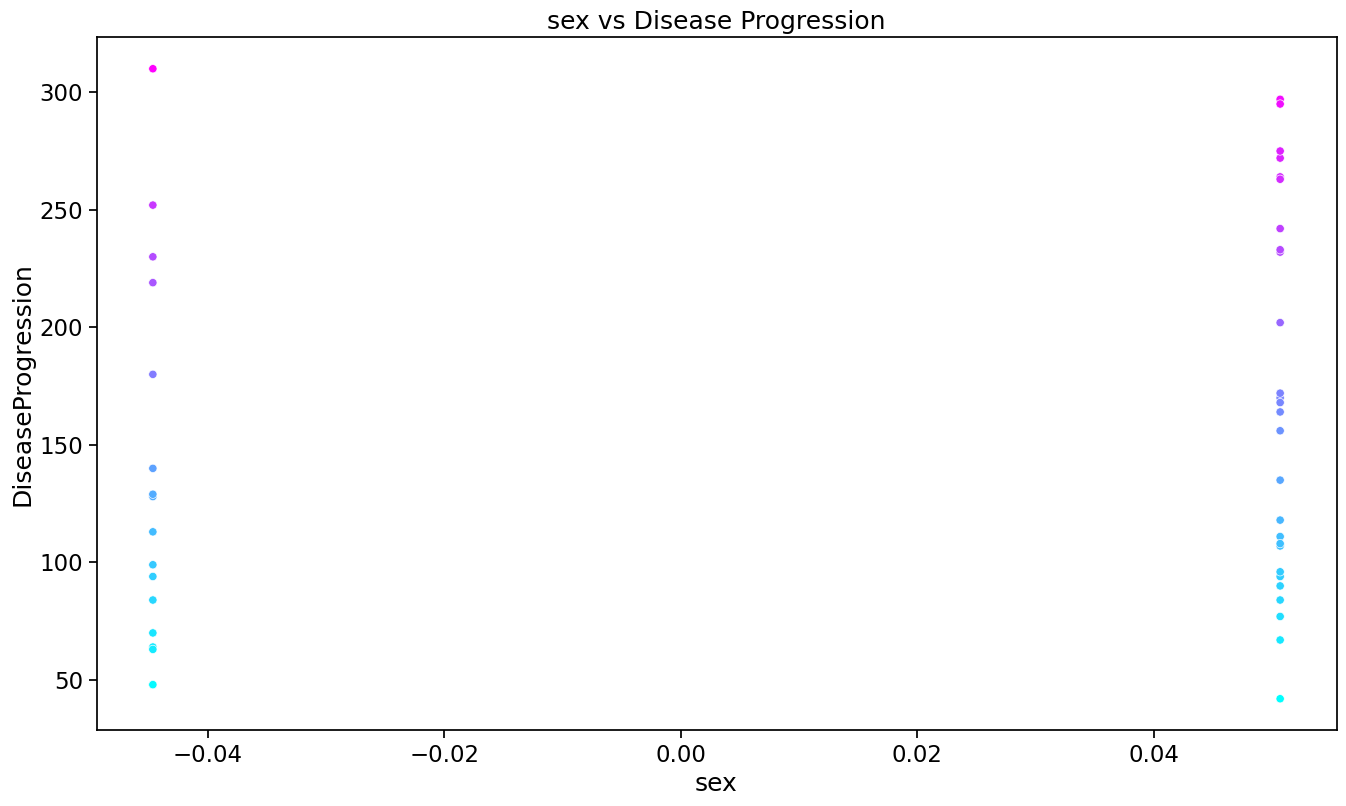

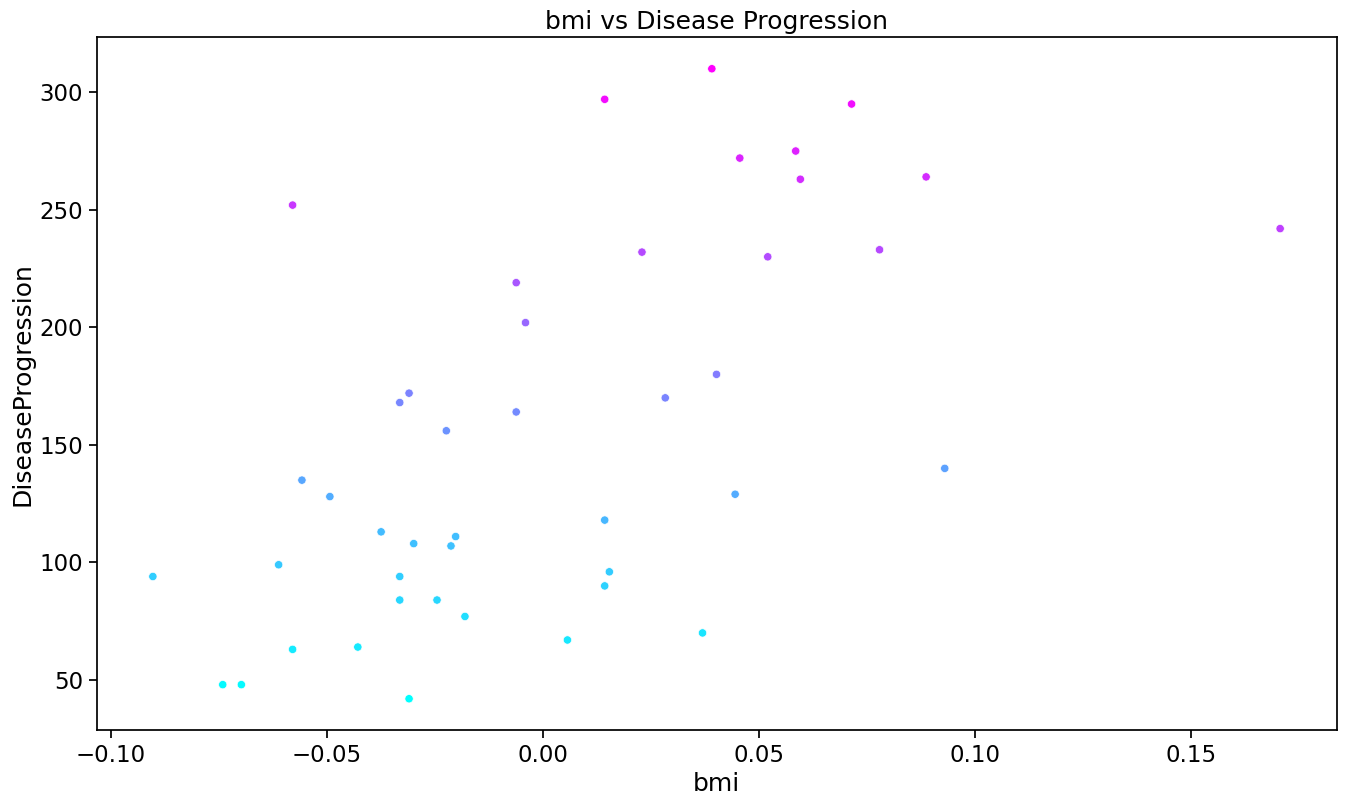

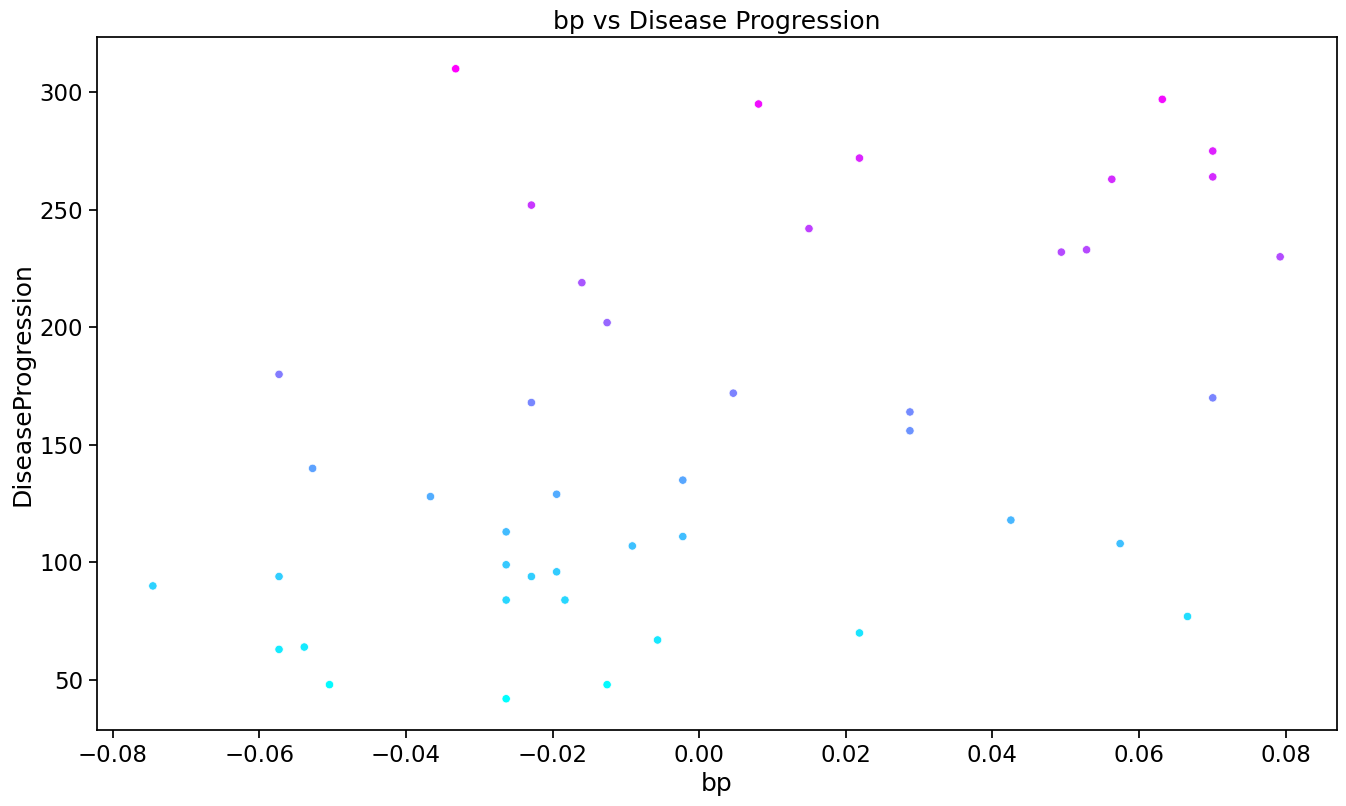

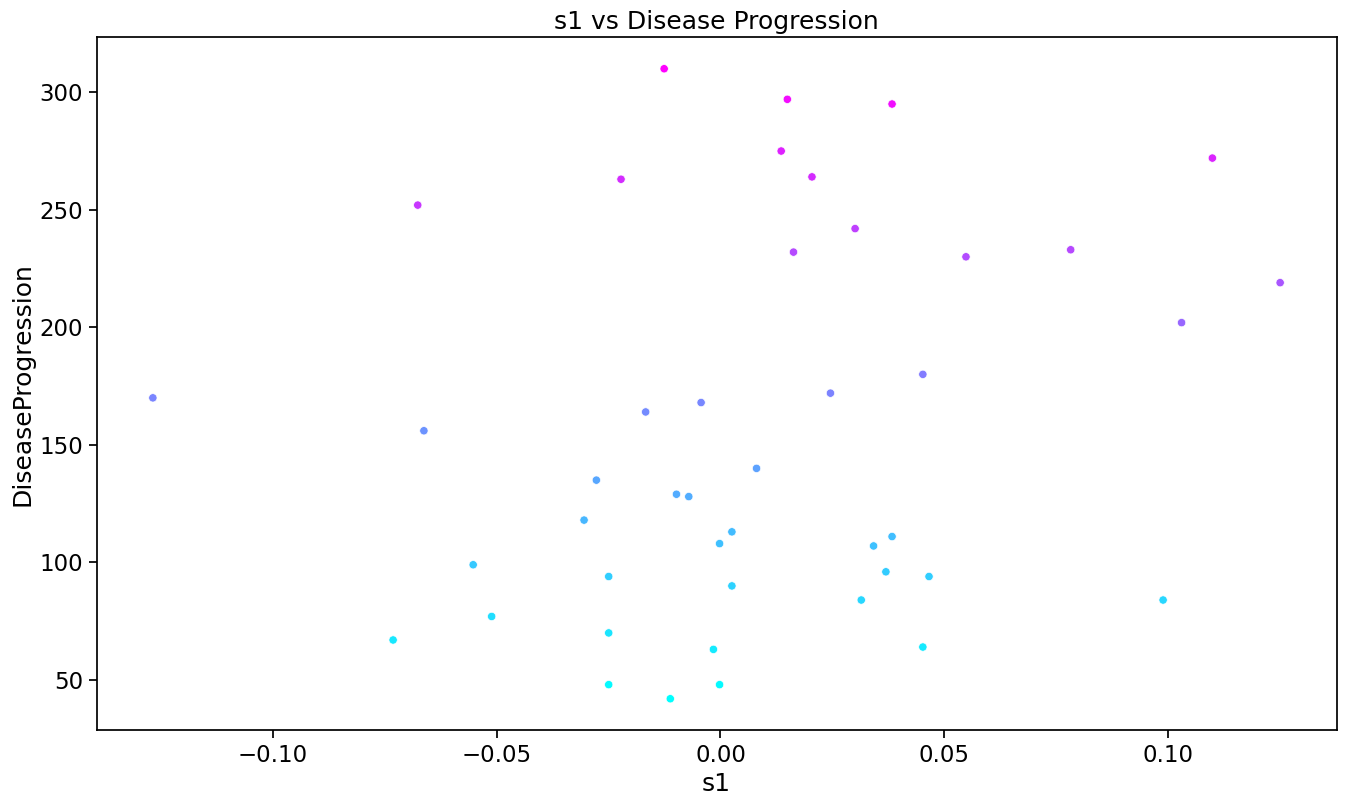

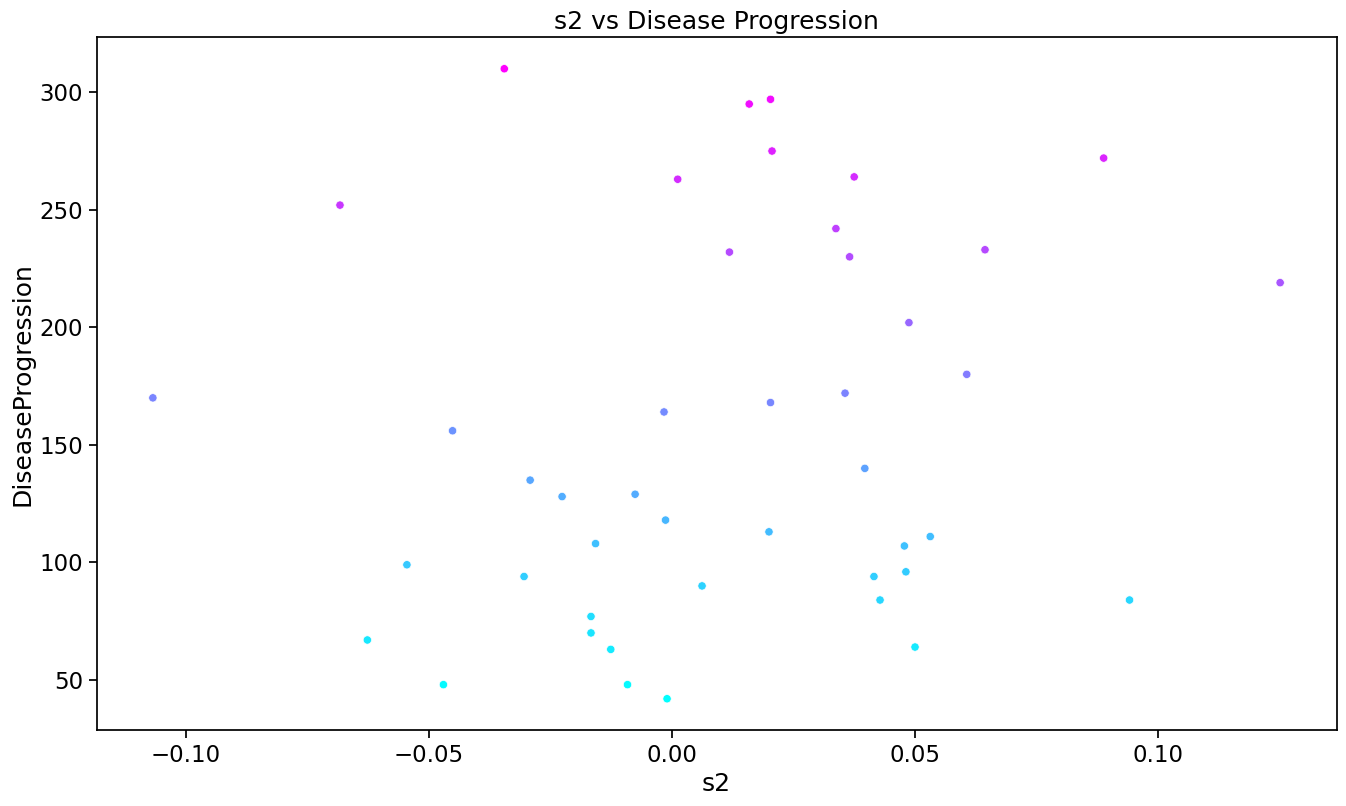

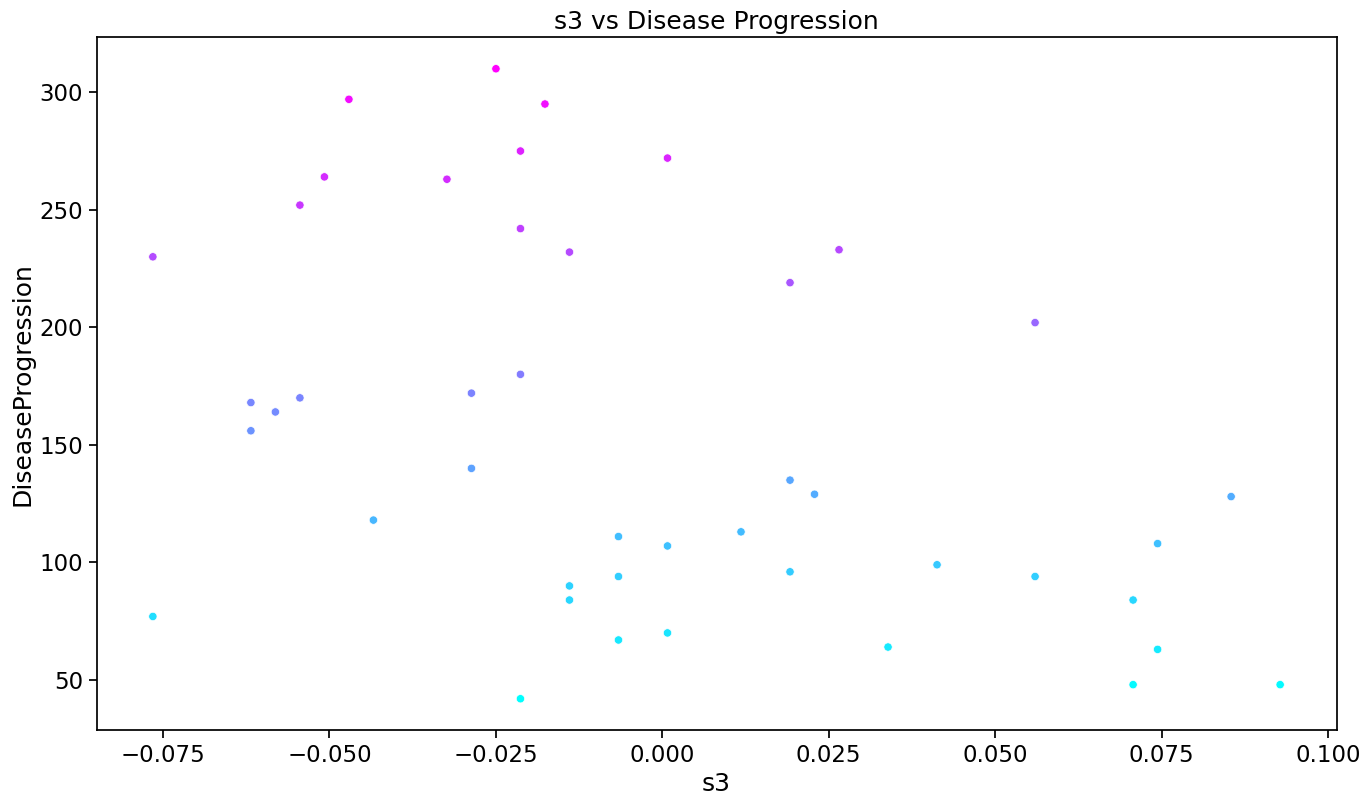

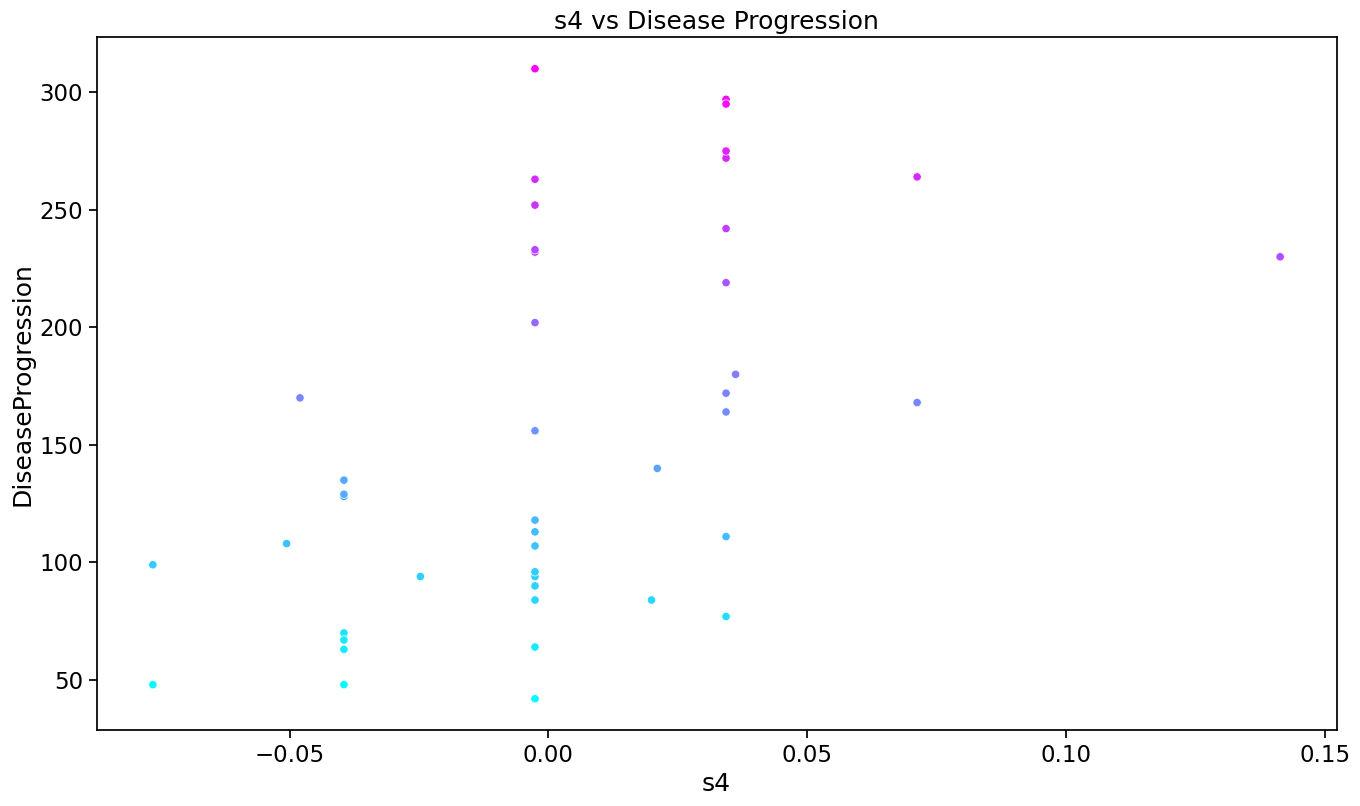

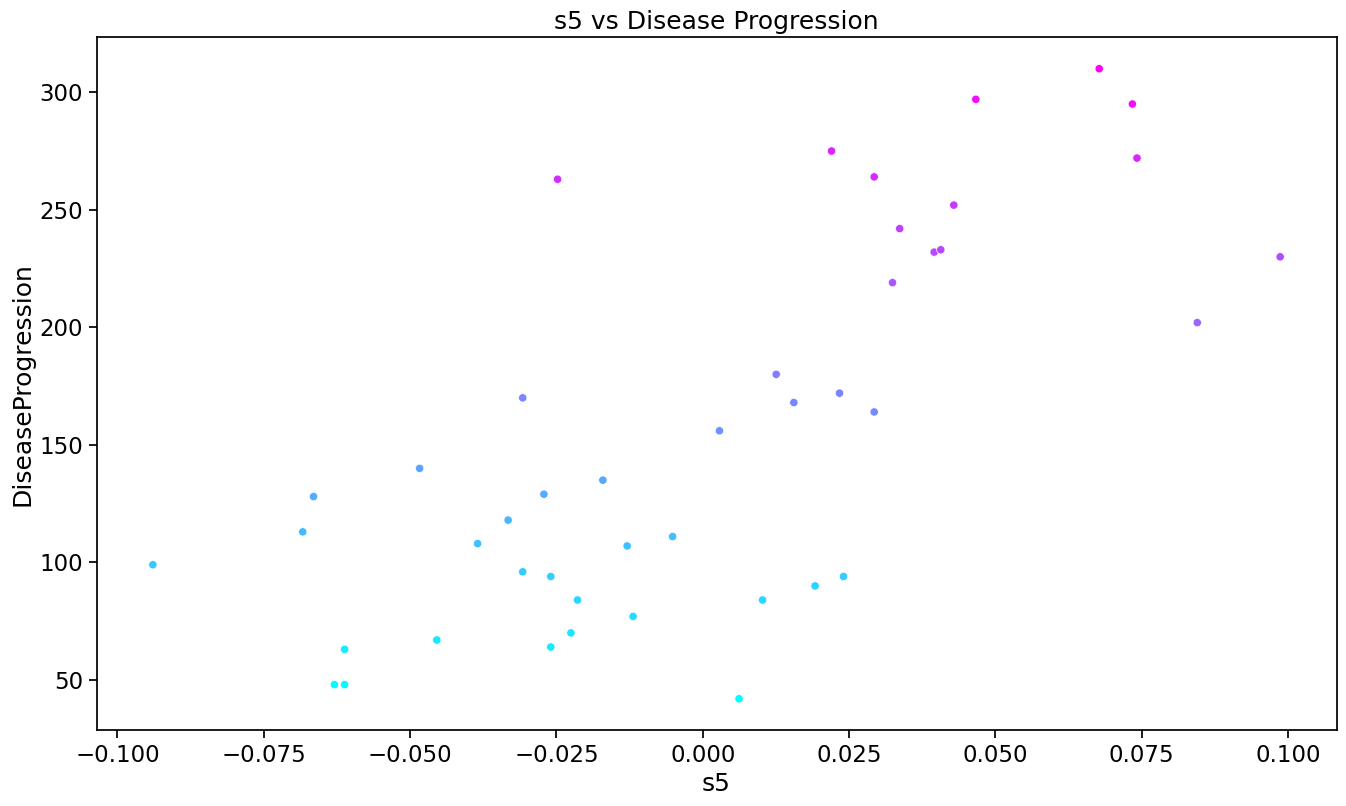

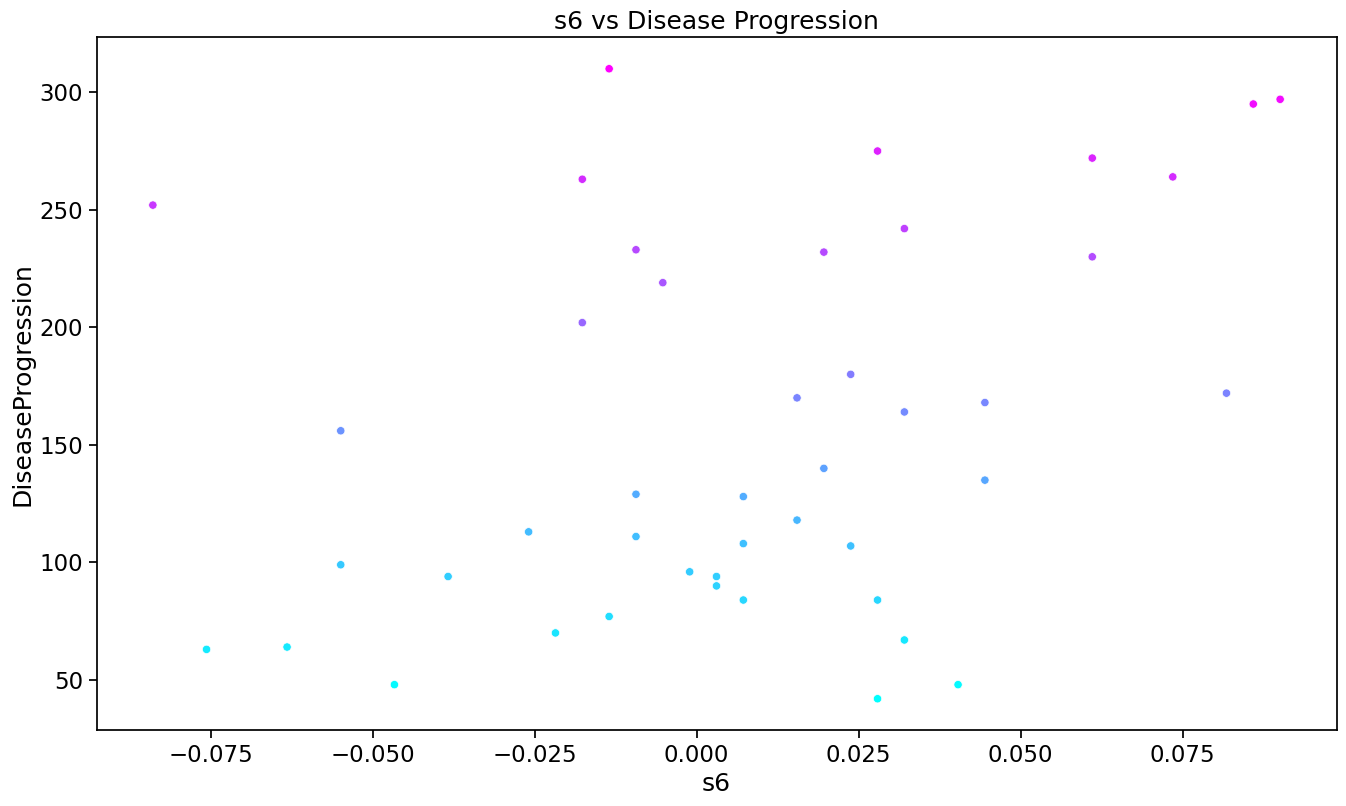

In [15]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature, y='DiseaseProgression', hue='DiseaseProgression', palette='cool', legend=False)
    plt.title(f"{feature} vs Disease Progression")
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=42
)

In [18]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [19]:
from sklearn.linear_model import LinearRegression


In [20]:
linear_regression = LinearRegression()

In [21]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [22]:
for i, name in enumerate(diabetes.feature_names):
    print(f"{name}: {linear_regression.coef_[i]}")

age: 37.904021350074984
sex: -241.96436231273995
bmi: 542.4287585162899
bp: 347.70384391385636
s1: -931.4888458835163
s2: 518.0622769833376
s3: 163.41998299131035
s4: 275.3179015786484
s5: 736.1988589046839
s6: 48.67065743196543


In [23]:
print(f"Intercept: {linear_regression.intercept_}")

Intercept: 151.34560453985995


In [24]:
predicted = linear_regression.predict(X_test)


In [25]:
print(f"Predicted values: {predicted[:5]}")
print(f"Expected values: {y_test[:5]}")


Predicted values: [139.5475584  179.51720835 134.03875572 291.41702925 123.78965872]
Expected values: [219.  70. 202. 230. 111.]


In [26]:
df = pd.DataFrame({
    'Expected': y_test,
    'Predicted': predicted
})

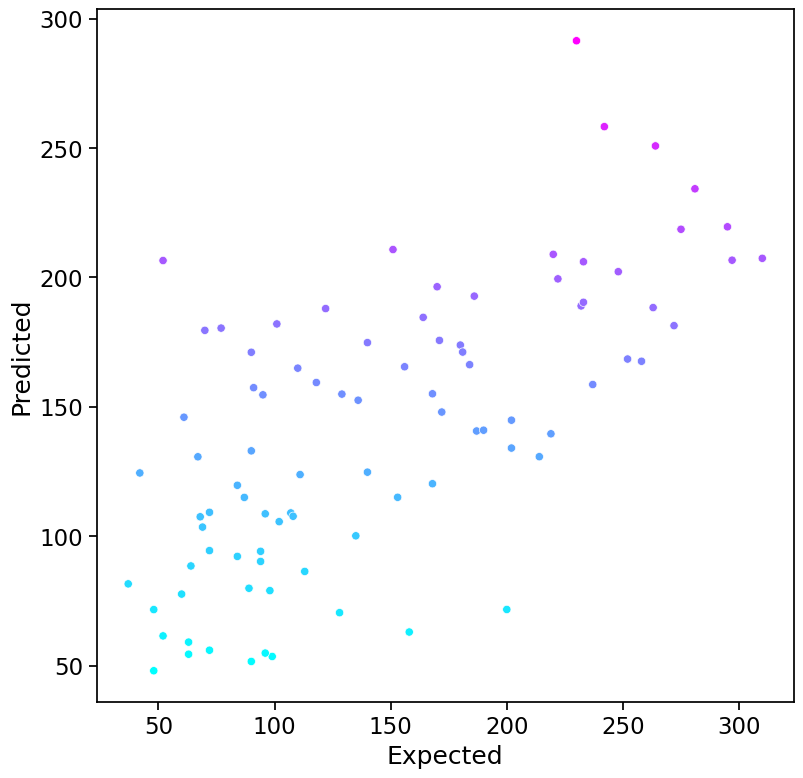

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

In [28]:
start = min(df['Expected'].min(), df['Predicted'].min())
end = max(df['Expected'].max(), df['Predicted'].max())


axes.set_xlim(start, end)
axes.set_ylim(start, end)

(37.0, 310.0)

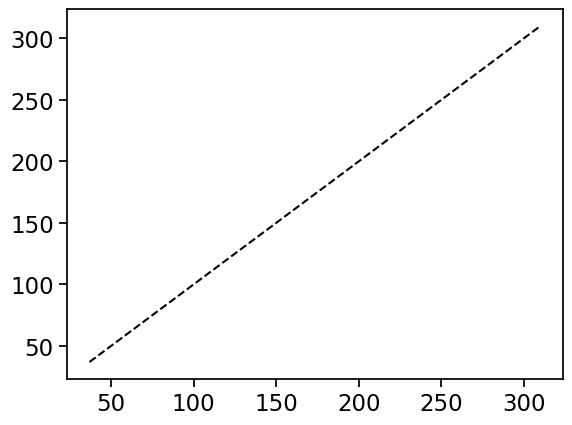

In [29]:
plt.plot([start, end], [start, end], 'k--')

In [31]:
from sklearn import metrics

In [44]:
from sklearn import metrics

metrics.r2_score(df['Expected'], df['Predicted'])

0.4526027629719195

In [45]:
metrics.mean_squared_error(df['Expected'], df['Predicted'])

2900.193628493482

In [46]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [47]:
estimators = {
    'LinearRegression' : linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
}

In [48]:
from sklearn.model_selection import KFold, cross_val_score

In [59]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=diabetes.data, y=diabetes.target, cv=kfold,
                             scoring='r2')
    print(f'{estimator_name:>16}:mean of r2 scores ={scores.mean():.3f}')

LinearRegression:mean of r2 scores =0.475
      ElasticNet:mean of r2 scores =-0.002
           Lasso:mean of r2 scores =0.339
           Ridge:mean of r2 scores =0.421
